In [1]:
# Inference with pre-trained models!
from hw.models.crnn import CRNN
from hw.data import IAMLineDataModule
from torchvision.transforms.v2.functional import to_pil_image

In [2]:
artifact_path = "pretrained/epoch=90-step=18473.ckpt"

model = CRNN.load_from_checkpoint(artifact_path).eval()
model = model.cuda()

In [3]:
# load some test data
# don't need to specify train xforms here
datamodule = IAMLineDataModule()
datamodule.setup()
for images, _, _, raw_text in datamodule.test_dataloader():
    break
preds = model.decode(images.cuda())

cessey on soldiering which stated that a fighting


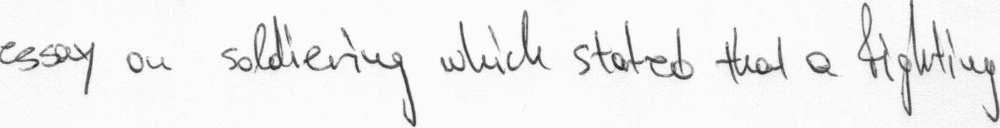

In [4]:
# you can see that it's actually kind of squished. Worth messing around with aspect ratio during training?
idx = 26
print(preds[idx])
to_pil_image(images[idx, ...])

In [5]:
# how about some aggregate stats?
# looks like the test partition is a bit tougher than validation! Should get around 8.5% CER (val was around 6%)
# to be fair, some of this handwriting is hard to read :P 

from lightning import Trainer

trainer = Trainer(accelerator="gpu", devices=1)

trainer.test(model, datamodule=datamodule)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_cer            0.08556302636861801
        test_loss           0.43406352400779724
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.43406352400779724, 'test_cer': 0.08556302636861801}]